In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from sklearn.model_selection import ParameterGrid
import os
import numpy.linalg as LA
import gzip

# load pickle module
import pickle

In [2]:
parameter = scipy.io.loadmat('../data/parameterestimate.mat')
alpha = parameter['alpha']

/Users/qingyao/anaconda3/envs/geo/lib/python3.11/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [17]:
alpha_mean = np.mean(alpha,axis=1) ## 3142

In [23]:
real_data_path = '/Users/qingyao/OneDrive - cumc.columbia.edu/machine_learning_data/'
cases = pd.read_csv(real_data_path + 'county_data/ts_covid19_confirmed_US_mainland.csv')

In [4]:
dates_col = cases.columns[40:41+315] 

In [12]:
daily_cases =  np.diff(np.array(cases[dates_col]))

In [18]:
### there are 3108 fips in the mainland 
### 3142 fips when i do the simulations
### need to compare them and find the intersection

In [37]:
fips_all = pd.read_csv('../data/testfips.csv')

In [46]:
fips_main = pd.read_csv(real_data_path+'county_data/fips_mainland.csv',names=['FIPS'])

In [55]:
mask = fips_all.FIPS.isin(fips_main.FIPS.values)

In [61]:
indices_main = mask[lambda x: x==True].index.tolist()

In [65]:
main_df = fips_all.loc[indices_main]

In [75]:
## select alpha of the main
alpha_mean_main = alpha_mean[indices_main,:]

In [78]:
estimated_daily_infections = daily_cases/alpha_mean_main

In [15]:
pop = np.loadtxt('pop_new.csv')

In [83]:
pop_main = pop[indices_main]

In [85]:
estimated_infec_perpop = estimated_daily_infections/pop_main[:,None]*100000
county_real = np.sum(estimated_infec_perpop>5,axis=0)

In [86]:
NewInf_ode = np.loadtxt('metapop.csv')

In [87]:
infec_perpop = NewInf_ode/pop[:,None]*100000
county_ode = np.sum(infec_perpop>5,axis=0)

(0.0, 60.0)

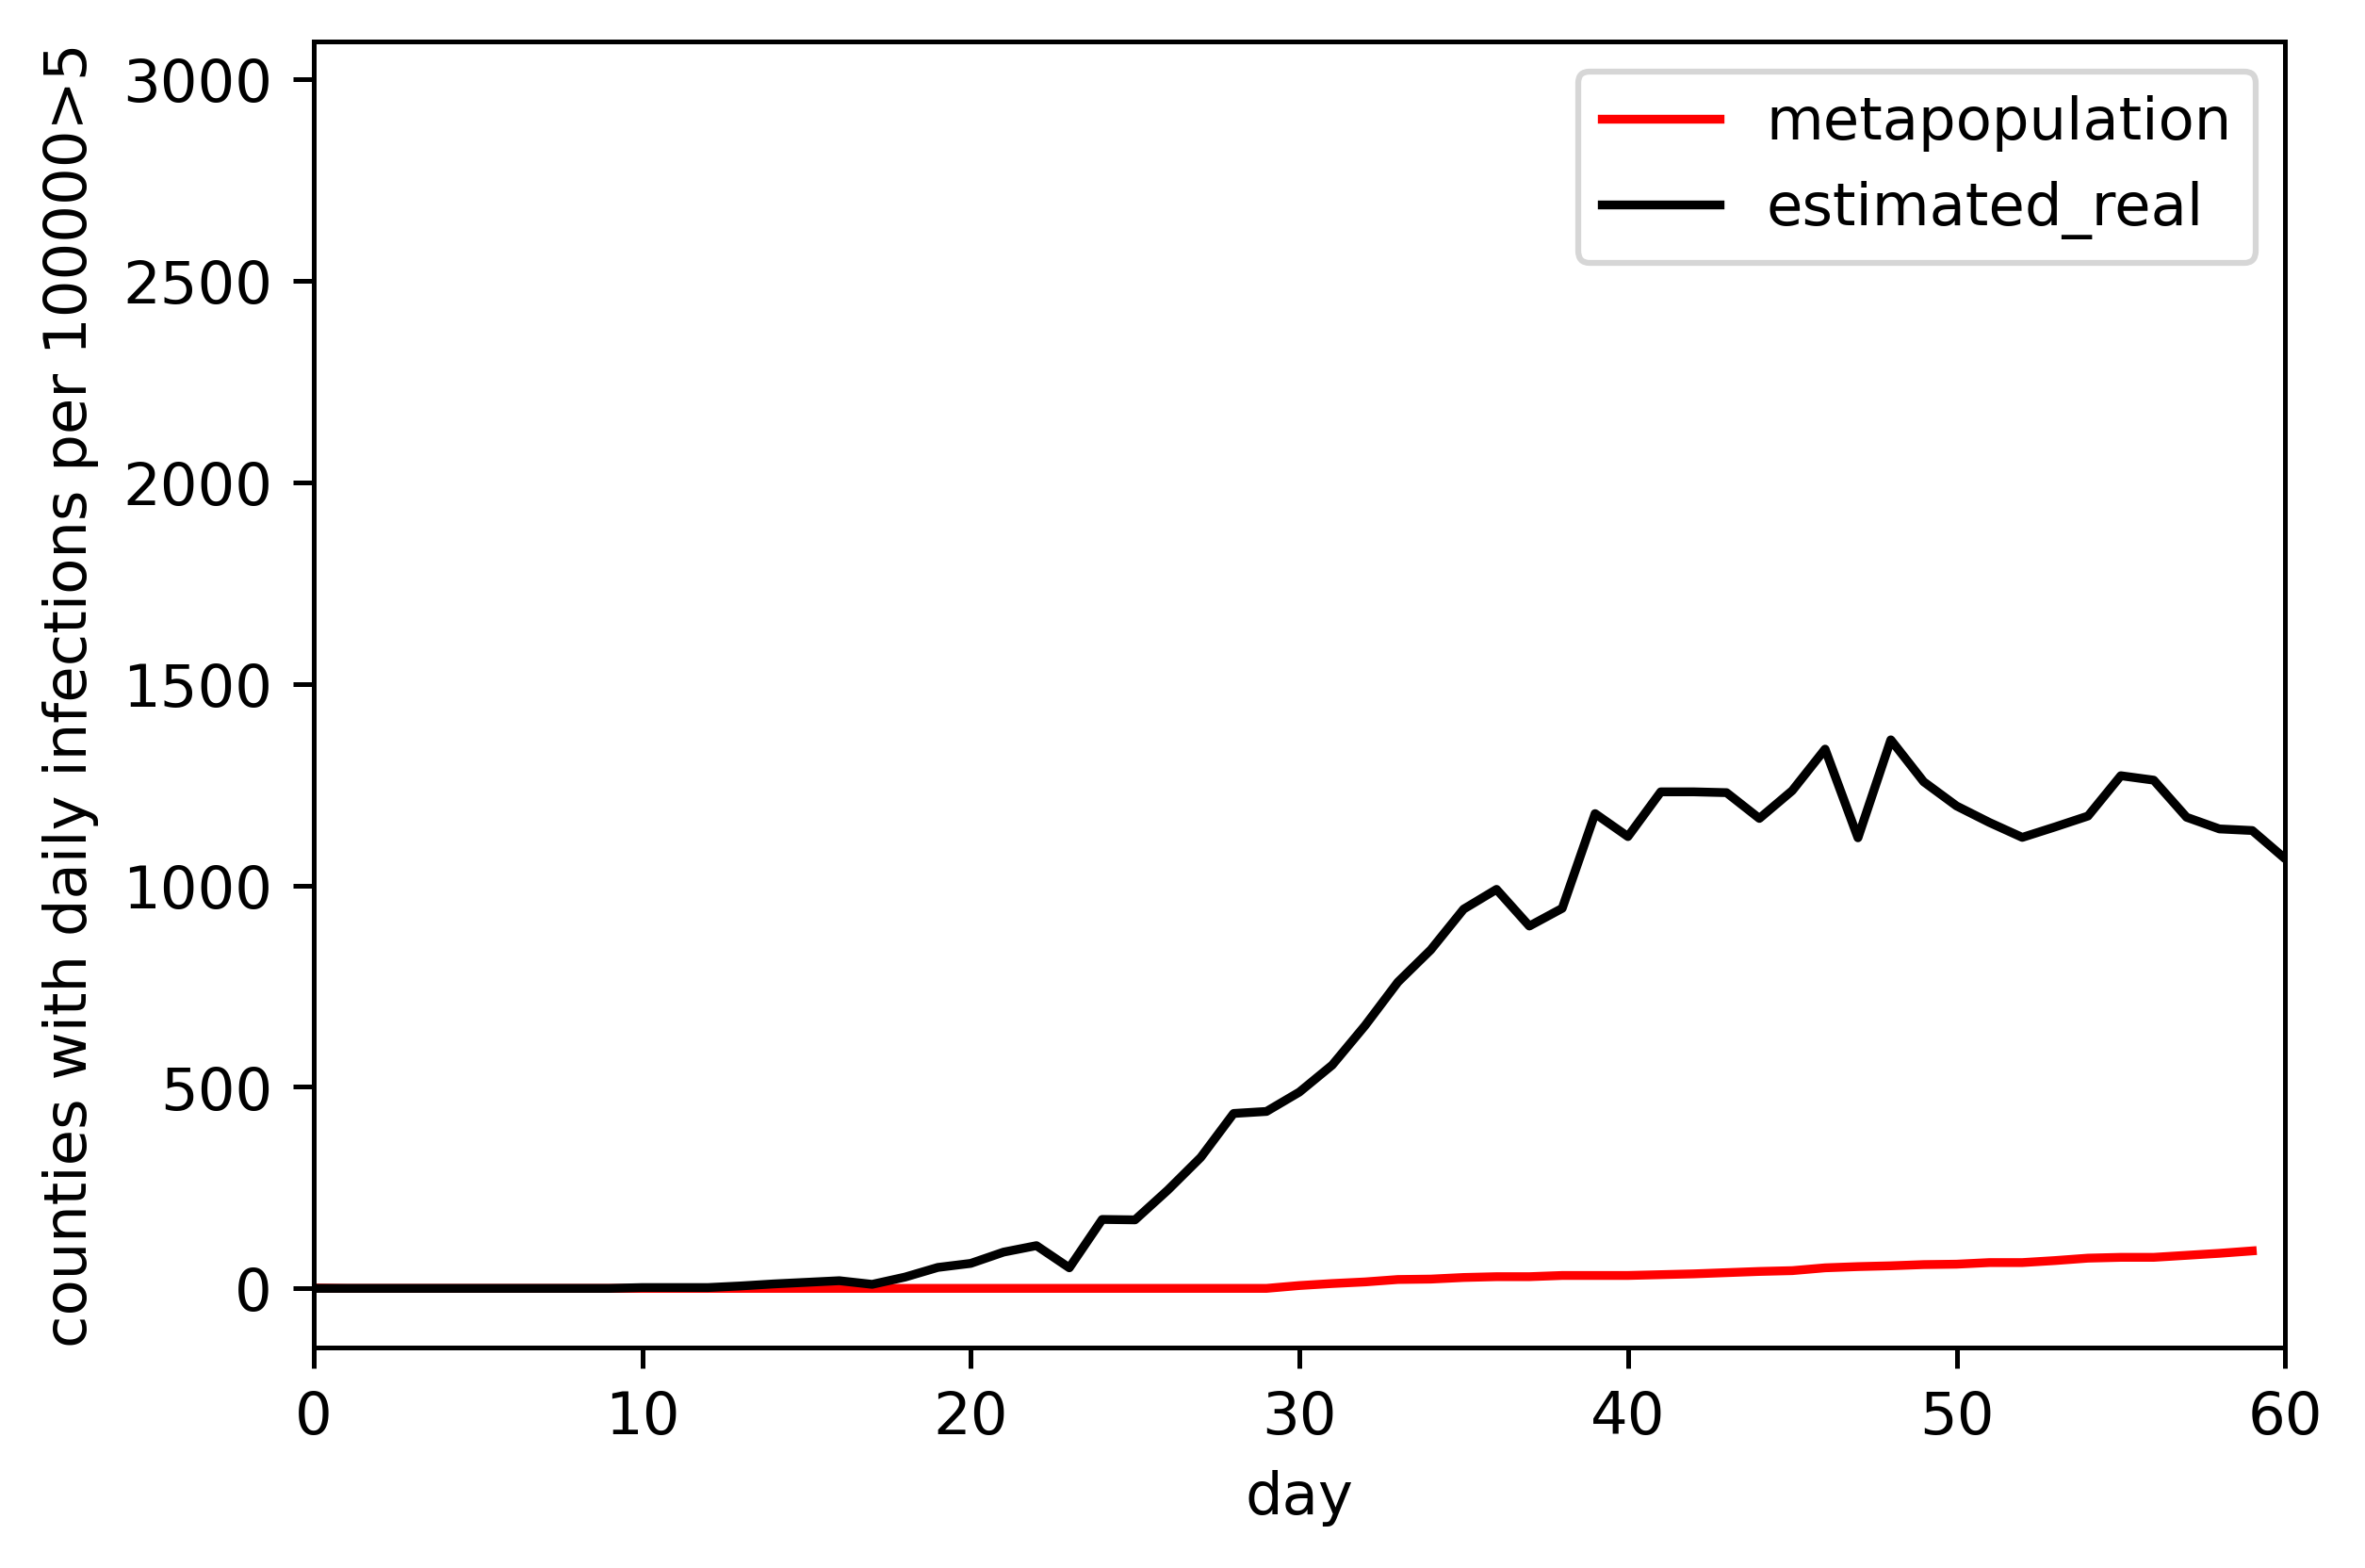

In [88]:
plt.figure(dpi=450,figsize=(6,4))
# for r_idx in range(9):
#     r = rs[r_idx]
#     mean_county1 =  E_mean_county[r_idx]
#     std_county1 = E_std_county[r_idx]
#     plt.plot(mean_county1,label='r={}'.format(r))
#     plt.fill_between(range(60),mean_county1-std_county1,mean_county1 +std_county1,alpha=0.1)


plt.plot(county_ode,label='metapopulation',color='red')
plt.plot(county_real,label='estimated_real',color='black')

plt.legend()
plt.xlabel('day')
plt.ylabel('counties with daily infections per 100000>5')
plt.xlim(0,60)
# plt.ylim(-1,40)

In [96]:
for d_i in range(11):
    n_c = np.sum(estimated_daily_infections[:,:d_i]>1)
    print('day_indices:',d_i,'number of counties cases estimated,',n_c)

day_indices: 0 number of counties cases estimated, 0
day_indices: 1 number of counties cases estimated, 0
day_indices: 2 number of counties cases estimated, 0
day_indices: 3 number of counties cases estimated, 0
day_indices: 4 number of counties cases estimated, 1
day_indices: 5 number of counties cases estimated, 2
day_indices: 6 number of counties cases estimated, 3
day_indices: 7 number of counties cases estimated, 3
day_indices: 8 number of counties cases estimated, 3
day_indices: 9 number of counties cases estimated, 6
day_indices: 10 number of counties cases estimated, 15


In [160]:
for d_i in range(1,15):
    potential_seed = list(np.where(estimated_daily_infections[:,d_i]>1)[0])
    fips_seed_idx = fips_main.loc[potential_seed].FIPS.values
    print('****************************************')
    for seed_idx in fips_seed_idx:
        print (fips_all[fips_all.FIPS==seed_idx])

****************************************
****************************************
****************************************
      ID                 Name  FIPS  STATE
218  219  Riverside County CA  6065      6
****************************************
      ID                   Name  FIPS  STATE
224  225  San Joaquin County CA  6077      6
****************************************
      ID                   Name  FIPS  STATE
224  225  San Joaquin County CA  6077      6
****************************************
****************************************
****************************************
        ID                  Name   FIPS  STATE
2241  2242  Washington County OR  41067     41
        ID            Name   FIPS  STATE
2969  2970  King County WA  53033     53
        ID                 Name   FIPS  STATE
2983  2984  Snohomish County WA  53061     53
****************************************
      ID               Name  FIPS  STATE
186  187  Alameda County CA  6001      6
      ID       

In [163]:
for d_i in range(1,15):
    potential_seed2 = list(np.where(estimated_infec_perpop[:,d_i]>1)[0])
    fips_seed_idx2 = fips_main.loc[potential_seed2].FIPS.values
    print('****************************************')
    for seed_idx in fips_seed_idx2:
        print (fips_all[fips_all.FIPS==seed_idx])

****************************************
****************************************
****************************************
****************************************
      ID                   Name  FIPS  STATE
224  225  San Joaquin County CA  6077      6
****************************************
      ID                   Name  FIPS  STATE
224  225  San Joaquin County CA  6077      6
****************************************
****************************************
****************************************
        ID                  Name   FIPS  STATE
2241  2242  Washington County OR  41067     41
        ID            Name   FIPS  STATE
2969  2970  King County WA  53033     53
        ID                 Name   FIPS  STATE
2983  2984  Snohomish County WA  53061     53
****************************************
      ID              Name  FIPS  STATE
195  196  Fresno County CA  6019      6
      ID                   Name  FIPS  STATE
228  229  Santa Clara County CA  6085      6
      ID     

In [157]:
## chose four of them 

In [162]:
fips_all[fips_all.STATE == 22]

,ID,Name,FIPS,STATE
1113,1114,Acadia Parish LA,22001,22
1114,1115,Allen Parish LA,22003,22
1115,1116,Ascension Parish LA,22005,22
1116,1117,Assumption Parish LA,22007,22
1117,1118,Avoyelles Parish LA,22009,22
...,...,...,...,...
1172,1173,Webster Parish LA,22119,22
1173,1174,West Baton Rouge Parish LA,22121,22
1174,1175,West Carroll Parish LA,22123,22
1175,1176,West Feliciana Parish LA,22125,22


In [166]:
la_idx = list(range(1113,1177))

In [168]:
estimated_daily_infections[la_idx,:15]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , 